In [144]:
# import python packages to notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Cleaning and Transformation (Data Processing)

- A couple rows were omitted due to their irrelevance to the model being developed
- Data types were transformed from string to integer values

In [145]:
# import data set
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [146]:
# examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [147]:
# discover null values
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [148]:
# drop rows that are not important for model prediction
df= df.drop('CHILD', axis= 1)

In [149]:
df= df.drop('OWNHOME', axis= 1)

In [150]:
df= df.drop('SPORT', axis= 1)

In [151]:
df= df.drop('COMP', axis= 1)

In [152]:
df= df.drop('PCTMARR', axis= 1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,194


In [153]:
# replace the missing values with null values
df = df.replace(r'\s+', np.nan, regex= True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,194


In [154]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
HOMEVAL        0
dtype: int64

In [155]:
# drop null values; there is enough information outside of the null values to create an accurate model
df= df.dropna()
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,203
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,0.0,92


In [156]:
# convert data types
df['AGE']= df['AGE'].astype(int)

In [157]:
df['INCOME']= df['INCOME'].astype(int)

In [158]:
df['GNDR']= df['GNDR'].astype(int)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 14 columns):
FAKEID      6214 non-null object
Y2defect    6214 non-null int64
Y1G5        6214 non-null int64
Y1G4        6214 non-null int64
Y1G3        6214 non-null int64
Y1G2        6214 non-null int64
Y1G1        6214 non-null int64
Y1price     6214 non-null int64
YEARS       6214 non-null int64
BACKER      6214 non-null int64
AGE         6214 non-null int64
INCOME      6214 non-null int64
GNDR        6214 non-null int64
HOMEVAL     6214 non-null int64
dtypes: int64(13), object(1)
memory usage: 728.2+ KB


In [160]:
# show details on the different variables used in the model
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,0.495977,0.340039,0.519794,0.626489,0.294657,0.480528,19.942066,6.371580,0.480367,61.121017,2.939170,0.460734,110.402800
std,0.500024,0.473760,0.499648,0.483775,0.455925,0.499661,8.732935,2.866329,0.499655,16.557860,1.833615,0.498496,89.354358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,0.000000,56.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,62.000000,3.000000,0.000000,80.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.000000,129.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,23.000000,1.000000,97.000000,6.000000,1.000000,593.000000


# Model Development (Data Processing)

In [161]:
# Decision Tree Model
y = df['Y2defect']
X = df[['YEARS', 'BACKER', 'AGE', 'INCOME']]

In [162]:
# setting base for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [163]:
# create decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
# display accuracy of decision tree model
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.538337801609
[[553 384]
 [477 451]]
             precision    recall  f1-score   support

          0       0.54      0.59      0.56       937
          1       0.54      0.49      0.51       928

avg / total       0.54      0.54      0.54      1865

0.538086404703


In [165]:
# Random Forest model; most accurate model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30)    #building 30 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.82941744448020593

In [166]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.82941744448
[[2574  558]
 [ 502 2580]]
             precision    recall  f1-score   support

          0       0.84      0.82      0.83      3132
          1       0.82      0.84      0.83      3082

avg / total       0.83      0.83      0.83      6214



In [167]:
# importance of variables in the data set
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,YEARS,0.207268
1,BACKER,0.040829
2,AGE,0.603978
3,INCOME,0.147926


In [168]:
# probabilities of defect
clf.predict_proba(X)

array([[ 0.8       ,  0.2       ],
       [ 0.18611111,  0.81388889],
       [ 0.68515873,  0.31484127],
       ..., 
       [ 0.5812963 ,  0.4187037 ],
       [ 0.4840873 ,  0.5159127 ],
       [ 0.83333333,  0.16666667]])

In [169]:
# k-nearest-neighbors model production
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 

In [170]:
# kneighbors classifier development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [171]:
# model evaluation; model is very accurate at 93%
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.549597855228
[[523 414]
 [426 502]]
             precision    recall  f1-score   support

          0       0.55      0.56      0.55       937
          1       0.55      0.54      0.54       928

avg / total       0.55      0.55      0.55      1865

0.549556315092


In [172]:
# cross validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.56019262  0.5329053   0.56038647  0.53623188  0.51851852  0.53784219
  0.50563607  0.55555556  0.56521739  0.52979066]
0.540227665728


In [173]:
# logistic regression model
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID', 'AGE', 'INCOME', 'GNDR'], axis=1)

In [174]:
# logistic regression model development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
# logistic regression accuracy
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.587131367292
[[577 360]
 [410 518]]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60       937
          1       0.59      0.56      0.57       928

avg / total       0.59      0.59      0.59      1865

0.586992372944


In [176]:
# probability of defect
probs = lr.predict_proba(X_test)
print probs

[[ 0.52353861  0.47646139]
 [ 0.30225935  0.69774065]
 [ 0.40072843  0.59927157]
 ..., 
 [ 0.62916168  0.37083832]
 [ 0.42502949  0.57497051]
 [ 0.36031824  0.63968176]]


In [177]:
# cross validation scores
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.57303371  0.59871589  0.62962963  0.58937198  0.59098229  0.61835749
  0.58293076  0.5942029   0.57971014  0.61352657]
0.597046135395


In [178]:
logit = sm.Logit(y, X) 
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.669173
         Iterations 4


In [179]:
# predictions on defect
print model_logit.predict()

[ 0.36130991  0.32874607  0.39547477 ...,  0.51971374  0.34902799
  0.51724453]


# Model Deployment & Prepare Entry Data (Data Processing)
- Some models were deployed above on original data set (knn, regression, random forest)
- The most reliable model is the random forest model with an accuracy of about 61.47%

In [180]:
# import second data set
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [181]:
# drop same rows that were dropped in first data set
df2= df2.drop('CHILD', axis= 1)

In [182]:
df2= df2.drop('OWNHOME', axis= 1)

In [183]:
df2= df2.drop('SPORT', axis= 1)

In [184]:
df2= df2.drop('COMP', axis= 1)

In [185]:
df2= df2.drop('PCTMARR', axis= 1)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,110


In [186]:
# replace null values in AGE column with the average age
df2= df2.fillna({'AGE': 61})
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,61.0,,0,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,110


In [187]:
# replace missing values in data set with null values
df2 = df2.replace(r'\s+', np.nan, regex= True)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,61.0,NaN,0.0,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,110


In [188]:
# discover null values
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE            0
INCOME      2415
GNDR         565
HOMEVAL        0
dtype: int64

In [189]:
# fill null values in INCOME column with the average income category
df2= df2.fillna({'INCOME': 3})

In [190]:
# fill null values in GNDR column with the average gender
df2= df2.fillna({'GNDR': 0})
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,61.0,3.0,0.0,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,110


In [191]:
df2.describe()

,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
count,0.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.00000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,NaN,0.171872,0.613708,0.433871,0.586984,0.52599,21.128694,6.001467,0.484804,61.821735,2.909872,0.404527,112.767554
std,NaN,0.377289,0.486924,0.495634,0.492401,0.49935,9.731992,3.119228,0.499795,14.151759,1.603910,0.490826,93.453839
min,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,3.000000,0.000000,54.000000,2.000000,0.000000,55.000000
50%,NaN,0.000000,1.000000,0.000000,1.000000,1.00000,15.000000,6.000000,0.000000,61.000000,3.000000,0.000000,81.000000
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.00000,25.000000,9.000000,1.000000,71.000000,4.000000,1.000000,134.000000
max,NaN,1.000000,1.000000,1.000000,1.000000,1.00000,50.000000,19.000000,1.000000,98.000000,6.000000,1.000000,600.000000


In [192]:
# convert data types to integer
df2['INCOME']= df2['INCOME'].astype(int)

In [193]:
df['AGE']= df['AGE'].astype(int)

The column names of validation dataset must be same as those of the training-testing dataset.

In [194]:
# confirm data types are correct
validation = df2[['YEARS', 'BACKER', 'AGE', 'INCOME']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 4 columns):
YEARS     9542 non-null int64
BACKER    9542 non-null int64
AGE       9542 non-null float64
INCOME    9542 non-null int64
dtypes: float64(1), int64(3)
memory usage: 298.3 KB


In [195]:
# create identitification numbers for each patron
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [196]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

In [197]:
output_scoring

array([1, 0, 0, ..., 0, 0, 1])

In [198]:
# applying the decision tree model to validation dataset
output_scoring2 = clf.predict(validation)

# generating probability for defect for each fan
probs2 = clf.predict_proba(validation)
probs2 = pd.DataFrame(probs2, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans2 = fakeid.join(probs2)

# joining dataframes (fakeid, probability, and prediction)
predicted_y2 = pd.DataFrame(output_scoring2, columns=['Predicted Defect'])
risky_fans2 = risky_fans2.join(predicted_y)

# generating submission file
risky_fans2.to_csv("submissionentry2.csv", index=False)

In [199]:
# random forest predictions on ticket renewal
output_scoring2

array([1, 0, 0, ..., 0, 0, 1])

- The model used to predict whether a customer will defect or not was the Random Forest Classifier; This was the most accurate model that was developed

# Data Visualization

In [200]:
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,203
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77,0,0,92


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26064190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c29f37810>]], dtype=object)

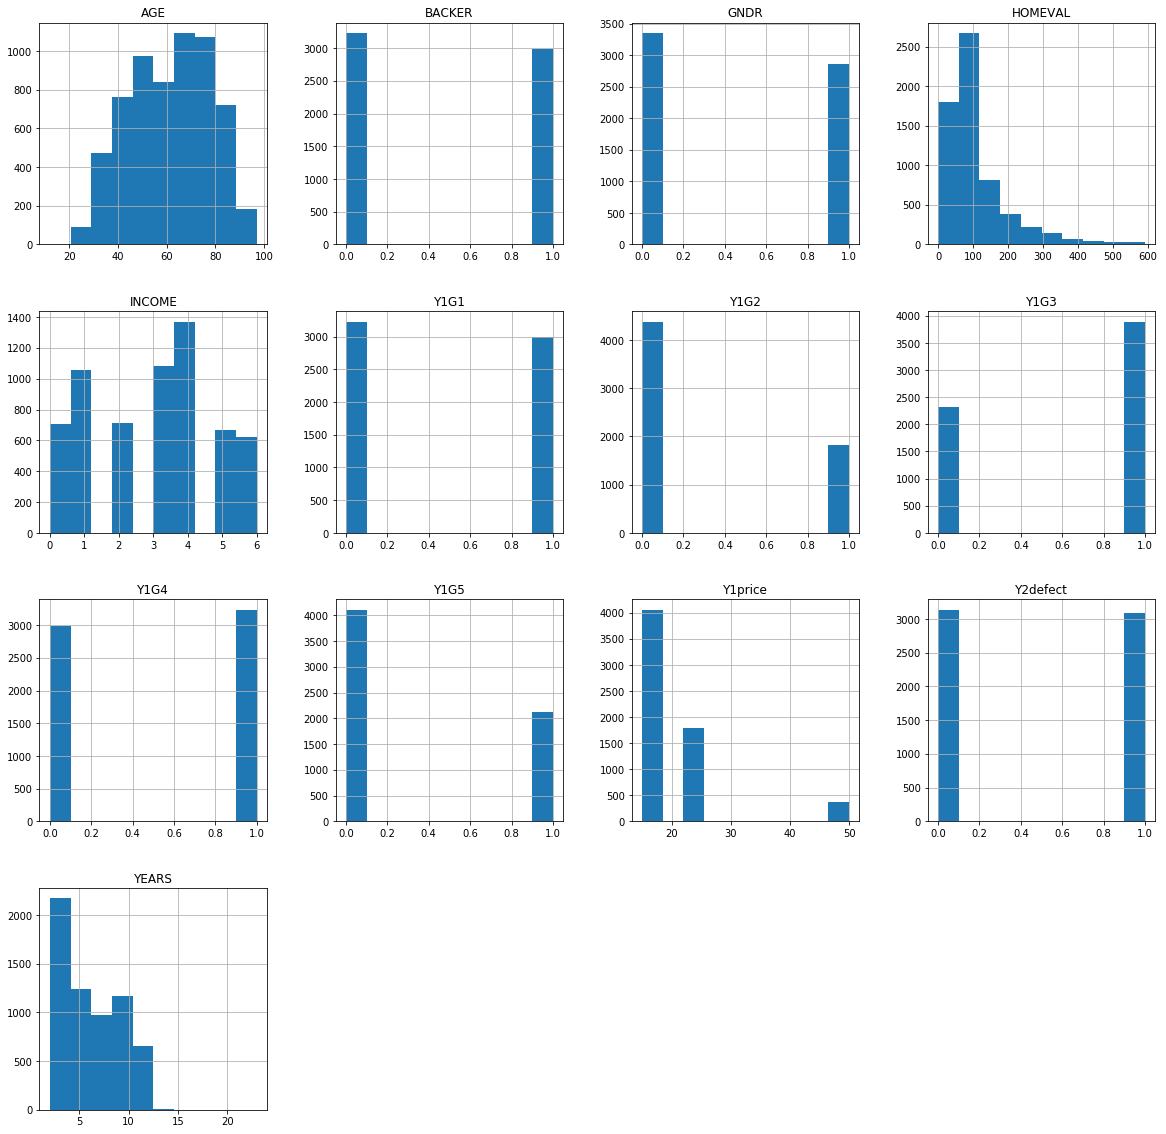

In [201]:
# show numbers on each individual variable
df.hist(figsize= (20,20))

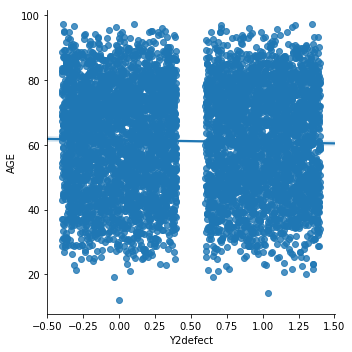

In [202]:
# age and defect do not seem to be highly correlated in any way
sns.lmplot("Y2defect", "AGE", df, x_jitter= .4, y_jitter= .4)

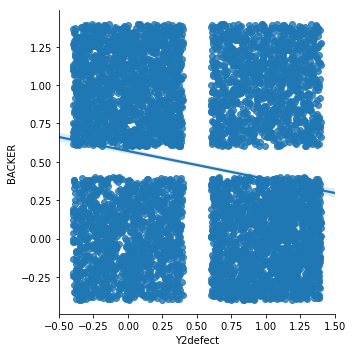

In [203]:
# a backer is slightly less likely to defect than a non-backer
sns.lmplot("Y2defect", "BACKER", df, x_jitter= .4, y_jitter= .4)

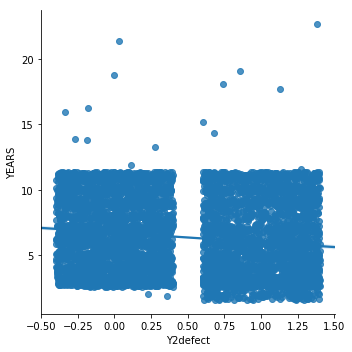

In [204]:
# no strong correlation between age and defect
sns.lmplot("Y2defect", "YEARS", df, x_jitter= .4, y_jitter= .4)

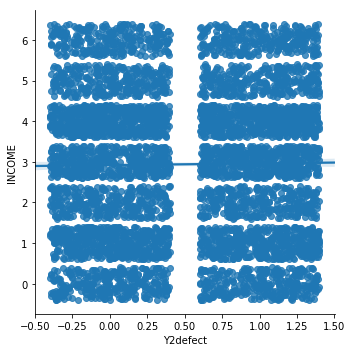

In [205]:
# no strong correlation between income and defect
sns.lmplot("Y2defect", "INCOME", df, x_jitter= .4, y_jitter= .4)

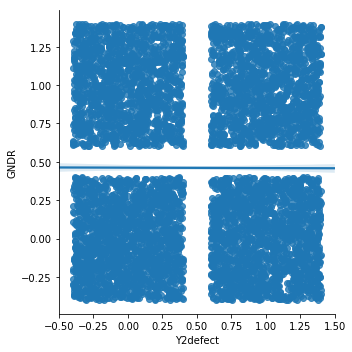

In [206]:
# no strong correlation between gender and defect
sns.lmplot("Y2defect", "GNDR", df, x_jitter= .4, y_jitter= .4)

# Exploratory Data Analysis

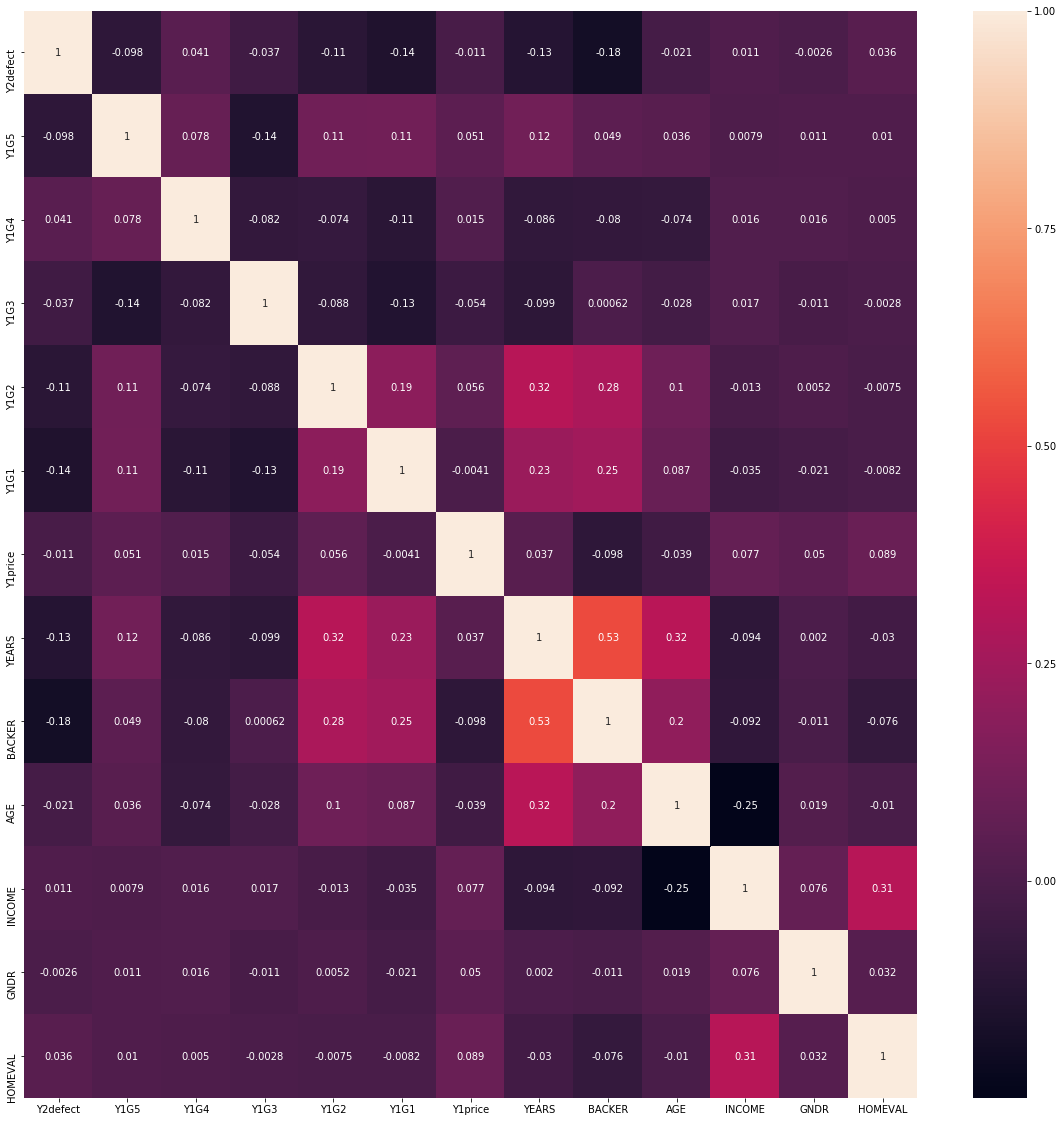

In [207]:
# correlation chart of variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [208]:
# correlation factors between variables
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL
Y2defect,1.000000,-0.097838,0.041228,-0.037153,-0.109527,-0.144940,-0.011480,-0.127372,-0.181988,-0.020781,0.011495,-0.002571,0.035777
Y1G5,-0.097838,1.000000,0.077973,-0.138184,0.110573,0.113307,0.050667,0.115901,0.048945,0.036118,0.007881,0.011224,0.010098
Y1G4,0.041228,0.077973,1.000000,-0.081608,-0.074006,-0.108378,0.015202,-0.085548,-0.080321,-0.074335,0.015545,0.016045,0.005004
Y1G3,-0.037153,-0.138184,-0.081608,1.000000,-0.088371,-0.134965,-0.053506,-0.099307,0.000620,-0.027872,0.016659,-0.011104,-0.002819
Y1G2,-0.109527,0.110573,-0.074006,-0.088371,1.000000,0.194404,0.056031,0.315991,0.280105,0.102732,-0.012826,0.005238,-0.007517
Y1G1,-0.144940,0.113307,-0.108378,-0.134965,0.194404,1.000000,-0.004132,0.233132,0.251188,0.086935,-0.035374,-0.020517,-0.008161
Y1price,-0.011480,0.050667,0.015202,-0.053506,0.056031,-0.004132,1.000000,0.037318,-0.097641,-0.038765,0.076975,0.050314,0.088744
YEARS,-0.127372,0.115901,-0.085548,-0.099307,0.315991,0.233132,0.037318,1.000000,0.527847,0.317249,-0.093972,0.002046,-0.030175
BACKER,-0.181988,0.048945,-0.080321,0.000620,0.280105,0.251188,-0.097641,0.527847,1.000000,0.200165,-0.092481,-0.010527,-0.075744
AGE,-0.020781,0.036118,-0.074335,-0.027872,0.102732,0.086935,-0.038765,0.317249,0.200165,1.000000,-0.249764,0.019354,-0.010251


# Business and Data Understanding

- The problem that needs to be solved is how to keep ticket holders from defaulting on their renewals.
- The model predicts the patrons that will not renew their subscriptions
- The patrons predicted to not renew their subcriptions should be e-mailed, called, or met with to discuss why they are not renewing the subsciption
- By targeting the people who are not planning on renewing the tickets, a number of them can be persuaded to change their decision to not renew
- The people predicted to renew their subcription should still be contacted to confirm the prediction
- The issue of patrons not renewing might not be a huge problem necessarily; it is probable that the subscriptions that are not renewed will be replaced by customers who had not had the season tickets for the season the data was taken from
- On the contrary, the more season ticket holders the better


# Analysis and Storytelling

Technical Take:

- The variables that affect a patron's decision the most according to the model from highest correlation to lowest: 
1) Backer/Not backer
2) # of years holding season tickets
3) Tickets being used for certain games of the season

- A couple thousand were predicted to defect on their season tickets. This number is significant enough to pursue the defecting customers. 

Managerial Take:

- Season ticket holder should be contacted one way or another to discuss the reason for defect. This will assist the program in finding ways to retain ticket holders.

- Ways to contact ticket holders:
1) In-person Meeting
2) Phone Call
3) E-mail
4) Survey

- Once the motives behind defect are discovered, an effort to reach an agreement between the ticket holder and the program can be made. This effort will be focused on the reason for defect, such as: too expensive, value was not realized, relocation, unsatisfactory environment, etc. 

- Another strategy that could save valuable time would be to analyze the correlation data so that the correct patrons are contacted right off the bat. For example, the "BACKER" variable was the highest indicator of whether or not a patron would defect. If a patron is predicted to defect, looking at whether or not the particular patron was a backer could save time and effort. If the patron was/is a backer, the sales department could find a patron predicted to defect who is not a backer because this prediction of defect is more likely to be correct. Each variable could be analyzed similarly to the "BACKER" variable.

- When discussing with a ticket holder, special/package deals could be presented to create a more attractive scenario for his/her decision. If this is done for every individual patron, hundreds of season ticket packages could be renewed for the next season. If this process is carried out carefully and deliberately, thousands of dollars in revenue could be "saved", giving the school more money to improve all aspects of the athletic department. Continuing this process year in and year out would gradually improve the successes of the school/athletic department (most likely increasing revenue at a decreasing rate).

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."
-- Sagin Churchman